In [24]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as mt
warnings.filterwarnings("ignore")



In [25]:
d = pd.read_excel(r"cds.xlsx")
d.index = np.arange( 1, len(d) + 1)
d.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [27]:
# rename for easier analysis
d=d.rename(columns={"past_3_years_bike_related_purchases":"3y_bike_purchases",
                   "deceased_indicator":"dec_indicator",
                   "job_industry_category":"job_industry",
                   "wealth_segment":"WS"}, inplace = False)

In [28]:
d=d.drop (['default'], 1, inplace=False)

In [29]:
d['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [30]:
d['gender']=d['gender'].replace(['F','Femal','M','U'], ['Female','Female','Male','Unspecified'])

In [31]:
d['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [32]:
d['customer_id'].unique()

array([   1,    2,    3, ..., 3998, 3999, 4000], dtype=int64)

In [33]:
def checkna():
    ret = []
    temp = list(d) #list of array names
    for each in temp:
        ret.append(d[each].isna().sum())
    return ret

nanlist = checkna()
print(nanlist, len(nanlist))
# need to check columns
check = []
k     = -1
for i in nanlist:
    k += 1 #k=0
    if i > 0:
        check.append(k)


[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 0, 87] 12


In [34]:
#Checking Uniqueness        
def check_unique():
    temp = list(d) #list of column names
    mydict = {} 
    for i in range(3, 13): #for columns with nan values
        ct = 0
        if nanlist[i] > 0: #if nan values are greater than 0
            ct = len(d[temp[i]].unique()) - 1 #find number of unique values in each column
        else:
            ct = len(d[temp[i]].unique()) #if 0 nan values
        mydict[temp[i]] = (ct, d[temp[i]].unique()) #for each column,create 
        #a dictionary of unique values
    return mydict


In [35]:
d['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [36]:
#Analyze the Gender vs Bikes bought
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in d['gender']: #increment counter for each occurence of gender
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def f1(v, gen):
    #'The two args are the value and gender'
    return int(v)

[2039, 1873, 88]


([<matplotlib.axis.XTick at 0x1ccf88ca248>,
 <a list of 6 Text xticklabel objects>)

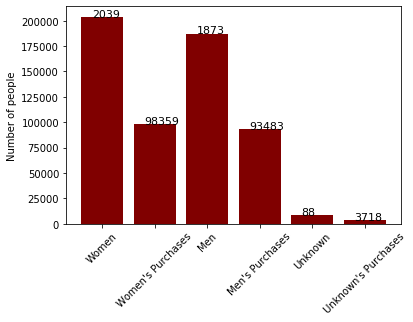

In [37]:
bk = [0,0,0] #no. of bikes purchased by each gender
bk[0] +=d['3y_bike_purchases'][d['gender'] == 'Female'].sum() + d['3y_bike_purchases'][d['gender'] == 'F'].sum()
bk[1] +=d['3y_bike_purchases'][d['gender'] == 'Male'].sum() + d['3y_bike_purchases'][d['gender'] == 'M'].sum()
bk[2] +=d['3y_bike_purchases'][d['gender'] == 'Unspecified'].sum()

g1 = [gender[0], bk[0], gender[1], bk[1], gender[2], bk[2]]
g2 = [gender[0]*100, bk[0], gender[1]*100, bk[1], gender[2]*100, bk[2]]#scale up gender by 10 for easier visualization
formatter = FuncFormatter(f1)
x = [0,1,2,3,4,5]
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, g2, color = 'Maroon')
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = g2[i]+0.1, s = g1[i], size = 11)

plt.xticks(x, ('Women', "Women's Purchases", 'Men', "Men's Purchases", 'Unknown', "Unknown's Purchases"), rotation=45)


Calculating average number of bikes sold according to gender

In [38]:
avg  = [0,0,0]
sm   = sum(bk) #total number of bikes sold
for i in range(len(avg)):  
    avg[i] += round(bk[i]/sm,3) 
    print(avg[i])

0.503
0.478
0.019


([<matplotlib.axis.XTick at 0x1ccf8906c08>,
 <a list of 3 Text xticklabel objects>)

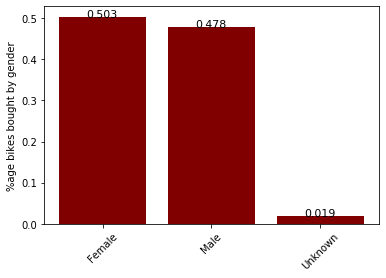

In [39]:
x1a = [0,1,2]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('%age bikes bought by gender')
plt.bar(x1a, avg, color = 'Maroon')
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 11)

plt.xticks(x1a, ('Female', 'Male', 'Unknown'), rotation=45)

# %age bikes bought by age

In [40]:
print(d["DOB"][1].ctime().split(" ")[4])
d["Age"] = 0
len1 = len(d["DOB"])
k    = 0
for i in range(1, len1):
    #Split the date according to its format
    if isinstance(d["DOB"][i], datetime.date):
        tl = len(d["DOB"][i].ctime().split(" ")) #how many parts does DOB contain
        d["Age"][i] += int(2020 - int(d["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(d["DOB"][i], str):
        tl = len(d["DOB"][i].split("-"))
        d["Age"][i] += int(2020 - int(d["DOB"][i].split("-")[tl-1])) 


1953


In [41]:
#same index as above
agerange = [0,0,0]
j       = 1
sage   = 0
stdv    = []
#Now we have 3 age ranges
for each in d['gender']: #loop through the gender column
    if each[0] == "F" and d['Age'][j] != 0: #non-zero age with female gender
        sage   += d['Age'][j]
        stdv.append((d['Age'][j]))
        agerange[0] += 1
    elif each[0] == "M" and d['Age'][j] != 0:
        sage += d['Age'][j]
        stdv.append((d['Age'][j]))
        agerange[1] += 1
    elif d['Age'][j] != 0: 
        sage += d['Age'][j]
        stdv.append((d['Age'][j]))
        agerange[2] += 1
    j += 1    
print("Sum of ages", sage)
print(agerange) # U gender has only 1 age so ignore it
#mean age of Male and Female
mean_val = round(sage/sum(agerange),0)
print(mean_val)
#Use Std Deviation to calculate age ranges
#sqrt(1/(N-1) * SUM(x-xmean)^2)
stdv_val = round(mt.sqrt(1/(sum(agerange)-1)*sum((stdv - (sage/sum(agerange)))**2)),0)
print(stdv_val)

Sum of ages 169932
[2039, 1872, 1]
43.0
34.0


In [42]:
#Purchases with age ranges 43 - 34/2, 43, 43 + 34/2 
age_dict = {}
f1  = [];bf1 = [];f2  = [];bf2 = [];f3  = [];bf3 = []; f4  = [];bf4 = [];
m1  = [];bm1 = [];m2  = [];bm2 = [];m3  = [];bm3 = [];m4  = [];bm4 = [];

fq = mean_val - stdv_val/2 #26
sq = mean_val   # 43
tq = mean_val + stdv_val/2 #60
print(fq, sq, tq)
ind1 = 1
for each in d['gender']:
    temp = int(d['Age'][ind1])
    bk1  = int(d['3y_bike_purchases'][ind1])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):         #AGE LESS THAN 26
            f1.append(temp) #25, 43, 60
            bf1.append(bk1)
        elif(fq < temp and temp <= sq):            # 26-43 
            f2.append(temp)
            bf2.append(bk1)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bk1)          #43-60
        elif(tq < temp):                 #60+
            f4.append(temp)
            bf4.append(bk1)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bk1)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bk1)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bk1)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bk1)
    ind1 += 1


26.0 43.0 60.0


<function matplotlib.pyplot.show(*args, **kw)>

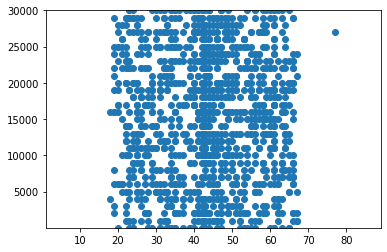

In [51]:
a=d.Age
b=1000*(d['3y_bike_purchases'])
plt.show
plt.scatter(a, b)
plt.xlim(1,89)
plt.ylim(1,30000)
plt.show

In [44]:
ga = {"Women1":f1,    #age ranges
       "Women2":f2,
       "Women3":f3,
       "Women4":f4,
       "Men1":m1,
       "Men2":m2,
       "Men3":m3,
       "Men4":m4,
      }
print(len(ga["Women1"]), len(ga["Women2"]), len(ga["Women3"]), len(ga["Women4"]))
print(len(ga["Men1"]), len(ga["Men2"]), len(ga["Men3"]), len(ga["Men4"]))

273 775 778 213
259 747 653 213


In [45]:
graph4 = [len(ga["Women1"]), len(ga["Men1"]), len(ga["Women2"]), len(ga["Men2"]), len(ga["Women3"]), len(ga["Men3"]), len(ga["Women4"]), len(ga["Men4"])]


([<matplotlib.axis.XTick at 0x1ccf9bebf88>,
 <a list of 8 Text xticklabel objects>)

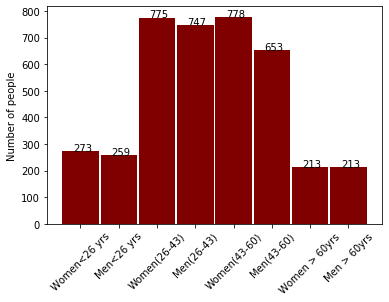

In [49]:
xn = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(xn, graph4, color = 'Maroon', width=0.95)
for i in range(len(graph4)):
    plt.text(x = i-0.2, y = graph4[i]+0.1, s = graph4[i], size = 10)

plt.xticks(xn, ('Women<26 yrs', "Men<26 yrs", 'Women(26-43)', "Men(26-43)", 'Women(43-60)', "Men(43-60)", 'Women > 60yrs', "Men > 60yrs"), rotation=45)

# Categorizing people based on their Jobs

In [28]:
d["job_industry"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry, dtype: int64

([<matplotlib.axis.XTick at 0x1ac3aac1c88>,
 <a list of 9 Text xticklabel objects>)

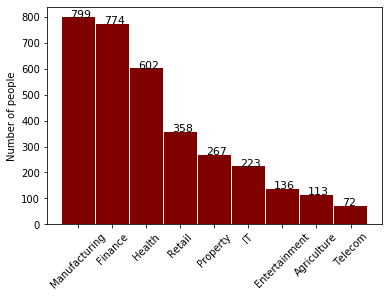

In [31]:
j1 = [799, 774, 602, 358, 267, 223, 136, 113, 72]
x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, j1, color='Maroon', width = 0.95)
for i in range(len(j1)):
    plt.text(x = i-0.25, y = j1[i]+0.1, s = j1[i], size = 11)

plt.xticks(x3, ("Manufacturing", "Finance", "Health", "Retail", "Property", "IT", "Entertainment", "Agriculture", "Telecom"),
           rotation=45)

# Wealth Segment vs People

In [222]:
d["WS"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: WS, dtype: int64

In [32]:
#split into 3: M (Mass), H(High), A(Affluent)

wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}
ind=1
    
 #remember fq = mean_val - stdv_val/2 ,sq = mean_val, tq = mean_val + stdv_val/2
 # 25, 42, 59
#split into 3: M (Mass), H(High), A(Affluent)

for each in d['WS']:
    temp = int(d['Age'][ind])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    ind += 1
print("Age Ranges: Less than 26, between 26 and 43, between 43 and 60, over 60 ")    
print(len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print(len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print(len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

Age Ranges: Less than 26, between 26 and 43, between 43 and 60, over 60 
261 777 697 219
125 399 361 111
146 346 470 0


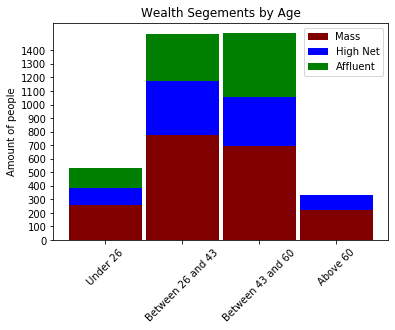

In [33]:
N = 4
wsmtp = [len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"])]
wshtp = [len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"])]
wsatp = [len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"])]

bars = np.add(wsmtp, wshtp).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the x locations for the groups
width = 0.95       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wsmtp, width, color='Maroon')
p2 = plt.bar(ind, wshtp, width,  bottom=wsmtp, color='Blue')
p3 = plt.bar(ind, wsatp, width,  bottom=bars, color='Green')

plt.ylabel('Amount of people')
plt.title('Wealth Segements by Age')
plt.xticks(ind, ('Under 26', 'Between 26 and 43','Between 43 and 60', 'Above 60'), rotation=45)
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

In [34]:
d["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64